#### Model Structure

In [3]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(1-0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP


----
#### Compiling Model

In [4]:
from keras import losses, optimizers

model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.RMSprop(lr=0.0001),
    metrics=["acc"]
)


----
#### Creating Generators for Dataset

In [5]:
from keras.preprocessing.image import ImageDataGenerator
import os

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/train"),
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/validation"),
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.



----
#### Fitting Models Using a Fit-Generator

In [4]:
import datetime

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)
model.save("models/cats_vs_dogs_{}.h5".format(datetime.datetime.utcnow().strftime("%Y-%m-%d_%H%M%S")))

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 34s 342ms/step - loss: 0.6876 - acc: 0.5197 - val_loss: 0.6734 - val_acc: 0.5603
Epoch 2/100
100/100 [==============================] - 26s 259ms/step - loss: 0.6757 - acc: 0.5672 - val_loss: 0.6590 - val_acc: 0.5851
Epoch 3/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6614 - acc: 0.5831 - val_loss: 0.6381 - val_acc: 0.6117
Epoch 4/100
100/100 [==============================] - 26s 258ms/step - loss: 0.6390 - acc: 0.6303 - val_loss: 0.6141 - val_acc: 0.6521
Epoch 5/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6239 - acc: 0.6419 - val_loss: 0.5952 - val_acc: 0.6618
Epoch 6/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6066 - acc: 0.6612 - val_loss: 0.5997 - val_acc: 0.6869
Epoch 7/100
100/100 [==============================] - 26s 260ms/step - loss: 0.6059 - acc: 0.6744 - val_loss: 0.5929 - val_acc: 0.6758



----
#### Plotting Loss & Accuracy

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history["acc"])+1)

plt.plot(epochs, history.history["loss"], "bo", label="Training")
plt.plot(epochs, history.history["val_loss"], "b", label="Validation")
plt.title("Training and Validation Loss")
plt.legend()

plt.savefig("../../docs/notes/img/convnetFromScratch_Loss.png")
plt.figure()

plt.plot(epochs, history.history["acc"], "bo", label="Training")
plt.plot(epochs, history.history["val_acc"], "b", label="Validation")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.savefig("../../docs/notes/img/convnetFromScratch_Accuracy.png")
plt.show()

NameError: name 'history' is not defined


----
#### Evaluate Sample

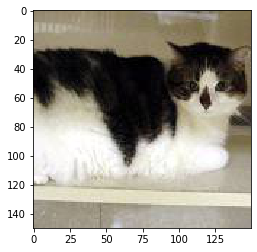

In [11]:
from keras.preprocessing import image
from random import randrange

fnames = [os.path.join(os.getcwd(), "dataset/test/cats/{}".format(fname)) for fname in os.listdir(os.path.join(os.getcwd(), "dataset/test/cats"))]\
         + [os.path.join(os.getcwd(), "dataset/test/dogs/{}".format(fname)) for fname in os.listdir(os.path.join(os.getcwd(), "dataset/test/dogs"))]

img_path = fnames[randrange(len(fnames))]
img = image.load_img(img_path, target_size=(150, 150))

plt.imshow(img)
plt.show()

